## Welcome to the miRNA Heatmap. The goal of this project is as follows:

1) Display 8-length sequences of 'A', 'T', 'G', 'C', in a 2d map

2) create heatmap of known miRNA using the 2d array

Lets import some librarys and then we can get started!

In [2]:
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np
from collections import Counter



The challenge of creating a 2d array of sequences is deciding how to organize it. We started by deciding that each corner would correspond to a particular nucleotide. To accomplish this, I created a fucntion that generates the different ATGC strings and sorts them according to the frequency of a given character. The Counter(str) function below counts the frequency of each character in the str, and adds it to an array if it is above a given threshold. Keep in mind, if the frequency of each character is the same, the first occuring character is considered the most frequent. By the nature of how the string are generated, this means that the same number of strings will be added to each array. 

Note the 'sorted()' function in the return line. This function sorts the array by frequency of a character, for example, if we are generating sequences with precedence 't', then 'tttttttt' would be sorted to the front of the list, followed by 'ttttttta' and 'tttttttc' and so on. 

In [220]:
#Generate tables (the order of the char in arr will affect the list outputted)

def list_generate(char):
    arr = ['a','t','c','g']
    list_= []

    for a in arr:
        for b in arr:
            for c in arr:
                for d in arr:
                    for e in arr:
                        for f in arr:
                            for g in arr:
                                for h in arr:
                                    str = a+b+c+d+e+f+g+h
                                    res = Counter(str)
                                    res = max(res, key = res.get)
                                    if(res==char):
                                        list_.append(str)
                                    
    #sort the array by char frequency

    return sorted(list_, key = lambda ele: -ele.count(char))


We now have 4 1d arrays containing all 65,536 sequences. In order to display them in a map, however, we have to convert the 1d arrays into a 2d representation. Because we have sorted them by frequency, we can fill a 2d array starting in the top left corner and filling in the diagnals, as shown in the picture below. 
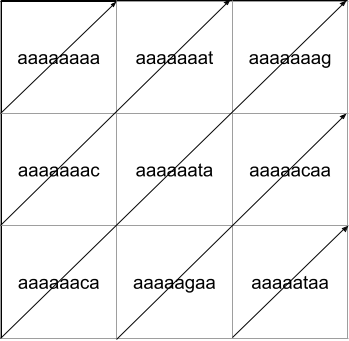

To do this, we simply iterate through the table and sum(row, col). The sum(row, col) corresponds to the diagnals of the array, which we can fill linearly with the array from before.

In [221]:
#generate 2d array from 1d list, print to .csv
def map_generate(list_, table_size):
    map_ = [[0 for i in range(table_size)] for j in range(table_size)]
    counter = 0;
    number = 0
    
    while(number < table_size*2):
        for i in range(0,table_size):
            for j in range(0,table_size):
                if (j+i==number):
                    map_[i][j]=list_[counter]
                    counter+=1
        number+=1
    return map_

We now can print each array out in the form of a spreadsheet (.csv). 

In [224]:
#print map
def print_map(filename, map_):
    df=pd.DataFrame(map_)
    df.to_csv(filename+'.csv', index= False, header = False)


We're almost done, however, due to the way we generated each 2d array, the top left corner of each spreadsheet contains the homopolymer ('tttttttt', 'cccccccc', 'gggggggg', 'aaaaaaaa') and gets filed outward from there. In order to complete the full map, we must rotate the spreadsheets to correspond to the 4 corners of the map. To do this, we use some simple matrix multiplication to rotate the spreadsheets. 

In [232]:
#print 90 deg anticlockwise rotation of matrix
def rotate_map(map_, rotations):
    df= pd.DataFrame(map_)
    for i in range(0,rotations%4):
        df = df.T
        df = df.loc[::-1]
    return df



We're finally ready to generate the full map. To do this, we generate each map separately, then rotate the spreadsheets accordingly, and stitch them back together (ideally, I would write some code to stitch them together, but for now I just copy and paste them together manually. It wouldn't be that hard to write, I'm just lazy). 

In [234]:
#
list_a = list_generate('a')
list_c = list_generate('c')
list_g = list_generate('g')
list_t = list_generate('t')

map_a = map_generate(list_a, 128)
map_c = map_generate(list_c, 128)
map_g = map_generate(list_g, 128)
map_t = map_generate(list_t, 128)

#rotate map_c 90°
map_c = rotate_map(map_c, 1)

#rotate map_g 180°
map_g = rotate_map(map_g, 2)

#rotate map_t 270°
map_t = rotate_map(map_t, 3)

print_map('arr_A', map_a)
print_map('arr_C', map_c)
print_map('arr_G', map_g)
print_map('arr_T', map_t)

Now that we have our completed map, we can use Seaborn to convert it into a heatmap.

In [14]:
df = pd.read_csv("ATGC.csv", header = None)
print(df)




          0         1         2         3         4         5         6    \
0    aaaaaaaa  aaaaaaat  aaaaaaag  aaaaaaga  aaaataaa  aaagaaaa  agaaaaaa   
1    aaaaaaac  aaaaaata  aaaaataa  aaaacaaa  aataaaaa  taaaaaaa  aaaaaacc   
2    aaaaaaca  aaaaacaa  aaaagaaa  aacaaaaa  caaaaaaa  aaaaaacg  aaaaatca   
3    aaaaagaa  aaataaaa  aagaaaaa  gaaaaaaa  aaaaaagt  aaaaatga  aaaaagag   
4    aaacaaaa  ataaaaaa  aaaaaatt  aaaaaagc  aaaaacat  aaaaagta  aaaatcaa   
..        ...       ...       ...       ...       ...       ...       ...   
251  cccctccc  ccccccct  cgcccccc  acccaccc  acccccgc  tccacccc  tcccccgc   
252  cctccccc  cccccacc  cccccccg  gccccccc  accctccc  accccgcc  tcctcccc   
253  cacccccc  cccacccc  ccccctcc  ccccccgc  aacccccc  accccacc  acccgccc   
254  accccccc  ctcccccc  ccctcccc  ccccccac  cccccgcc  atcccccc  acccctcc   
255  cccccccc  tccccccc  ccaccccc  ccccaccc  cccccctc  ccccgccc  acaccccc   

          7         8         9    ...       246       247       248  \
0  